La data viene de https://www.kaggle.com/datasets/carrie1/ecommerce-data?rvi=1

In [2]:
import pandas as pd
df=pd.read_csv("content/data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str})

In [3]:
df.shape

(541909, 8)

In [4]:
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [5]:
df=df.dropna(axis=0)
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [8]:
top_products=df['Description'].value_counts().nlargest(5)
top_products

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: Description, dtype: int64

Generaremos columnas con los valores más comunes, para perfilar el tipo de compra de cada cliente.

In [9]:
dfGroupedItem=df.groupby(['CustomerID','Description']).agg(ItemCount=('InvoiceNo', 'count')).reset_index()
dfGroupedItem

,CustomerID,Description,ItemCount
0,12346,MEDIUM CERAMIC TOP STORAGE JAR,2
1,12347,3D DOG PICTURE PLAYING CARDS,5
2,12347,3D SHEET OF CAT STICKERS,1
3,12347,3D SHEET OF DOG STICKERS,1
4,12347,60 TEATIME FAIRY CAKE CASES,3
...,...,...,...
269152,18287,STAR T-LIGHT HOLDER WILLIE WINKIE,1
269153,18287,STRAWBERRY BATH SPONGE,1
269154,18287,STRAWBERRY CERAMIC TRINKET BOX,1
269155,18287,SWISS CHALET TREE DECORATION,2


In [8]:
# Create a new DataFrame with a column for each of the top products
pivot_df = pd.pivot_table(dfGroupedItem, index=dfGroupedItem.index, columns='Description', aggfunc=lambda x: 1 if x.iloc[0] in top_products else 0)

# Fill NaN values with 0
pivot_df = pivot_df.fillna(0)

pivot_df.head()

In [10]:
df['TotalValue']=df['UnitPrice']*df['Quantity']

In [11]:
df_grouped=df.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate':'first', 'TotalValue':'sum'}).reset_index()

df_grouped.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalValue
0,12346,541431,1/18/2011 10:01,77183.60
1,12346,C541433,1/18/2011 10:17,-77183.60
2,12347,537626,12/7/2010 14:57,711.79
3,12347,542237,1/26/2011 14:30,475.39
4,12347,549222,4/7/2011 10:43,636.25


In [12]:
df_grouped['InvoiceDate']=pd.to_datetime(df_grouped['InvoiceDate'])
df_grouped=df_grouped.sort_values(['CustomerID', 'InvoiceDate'])

In [13]:
df_grouped.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalValue
0,12346,541431,2011-01-18 10:01:00,77183.60
1,12346,C541433,2011-01-18 10:17:00,-77183.60
2,12347,537626,2010-12-07 14:57:00,711.79
3,12347,542237,2011-01-26 14:30:00,475.39
4,12347,549222,2011-04-07 10:43:00,636.25


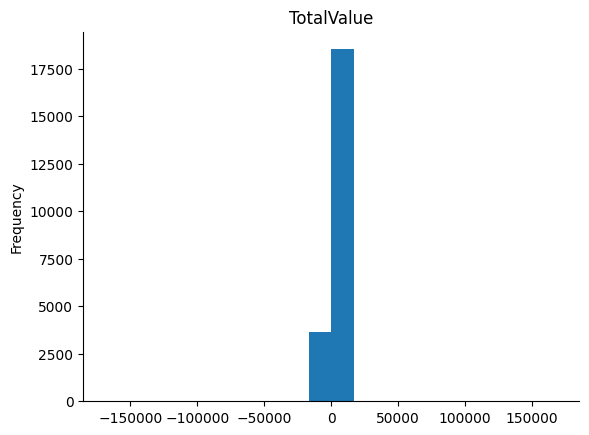

In [14]:
# @title TotalValue

from matplotlib import pyplot as plt
df_grouped['TotalValue'].plot(kind='hist', bins=20, title='TotalValue')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
df.describe()

,Quantity,UnitPrice,TotalValue
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,20.401854
std,248.693370,69.315162,427.591718
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.200000
50%,5.000000,1.950000,11.100000
75%,12.000000,3.750000,19.500000
max,80995.000000,38970.000000,168469.600000


In [17]:
df_grouped['DateDiff'] = df_grouped.groupby('CustomerID')['InvoiceDate'].diff().dt.days
df_grouped

,CustomerID,InvoiceNo,InvoiceDate,TotalValue,DateDiff
0,12346,541431,2011-01-18 10:01:00,77183.60,NaN
1,12346,C541433,2011-01-18 10:17:00,-77183.60,0.0
2,12347,537626,2010-12-07 14:57:00,711.79,NaN
3,12347,542237,2011-01-26 14:30:00,475.39,49.0
4,12347,549222,2011-04-07 10:43:00,636.25,70.0
...,...,...,...,...,...
22185,18283,579673,2011-11-30 12:59:00,223.61,6.0
22186,18283,580872,2011-12-06 12:02:00,208.00,5.0
22187,18287,554065,2011-05-22 10:39:00,765.28,NaN
22188,18287,570715,2011-10-12 10:23:00,1001.32,142.0


In [19]:
missing_percentage = df_grouped.isnull().sum() / df_grouped.shape[0] * 100
missing_percentage

CustomerID      0.000000
InvoiceNo       0.000000
InvoiceDate     0.000000
TotalValue      0.000000
DateDiff       19.702569
dtype: float64

In [20]:
# Drop columns with missing values
df_grouped = df_grouped.dropna(axis=0)
missing_percentage = df_grouped.isnull().sum() / df_grouped.shape[0] * 100
missing_percentage

CustomerID     0.0
InvoiceNo      0.0
InvoiceDate    0.0
TotalValue     0.0
DateDiff       0.0
dtype: float64

In [22]:
df_grouped.describe()
df_grouped

,CustomerID,InvoiceNo,InvoiceDate,TotalValue,DateDiff
1,12346,C541433,2011-01-18 10:17:00,-77183.60,0.0
3,12347,542237,2011-01-26 14:30:00,475.39,49.0
4,12347,549222,2011-04-07 10:43:00,636.25,70.0
5,12347,556201,2011-06-09 13:01:00,382.52,63.0
6,12347,562032,2011-08-02 08:48:00,584.91,53.0
...,...,...,...,...,...
22184,18283,578262,2011-11-23 13:27:00,313.65,12.0
22185,18283,579673,2011-11-30 12:59:00,223.61,6.0
22186,18283,580872,2011-12-06 12:02:00,208.00,5.0
22188,18287,570715,2011-10-12 10:23:00,1001.32,142.0


In [23]:
df_grouped = df_grouped[(df_grouped['TotalValue'] > 0)]
df_grouped.shape

(14339, 5)

In [25]:
df_grouped

,CustomerID,InvoiceNo,InvoiceDate,TotalValue,DateDiff
3,12347,542237,2011-01-26 14:30:00,475.39,49.0
4,12347,549222,2011-04-07 10:43:00,636.25,70.0
5,12347,556201,2011-06-09 13:01:00,382.52,63.0
6,12347,562032,2011-08-02 08:48:00,584.91,53.0
7,12347,573511,2011-10-31 12:25:00,1294.32,90.0
...,...,...,...,...,...
22184,18283,578262,2011-11-23 13:27:00,313.65,12.0
22185,18283,579673,2011-11-30 12:59:00,223.61,6.0
22186,18283,580872,2011-12-06 12:02:00,208.00,5.0
22188,18287,570715,2011-10-12 10:23:00,1001.32,142.0


/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_72104/2470266219.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped[['TotalValue', 'DateDiff']] = scaler.fit_transform(df_grouped[['TotalValue', 'DateDiff']])


,CustomerID,InvoiceNo,InvoiceDate,TotalValue,DateDiff
3,12347,542237,2011-01-26 14:30:00,-0.012347,0.225187
4,12347,549222,2011-04-07 10:43:00,0.078471,0.632322
5,12347,556201,2011-06-09 13:01:00,-0.064779,0.496610
6,12347,562032,2011-08-02 08:48:00,0.049485,0.302736
7,12347,573511,2011-10-31 12:25:00,0.449999,1.020069


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


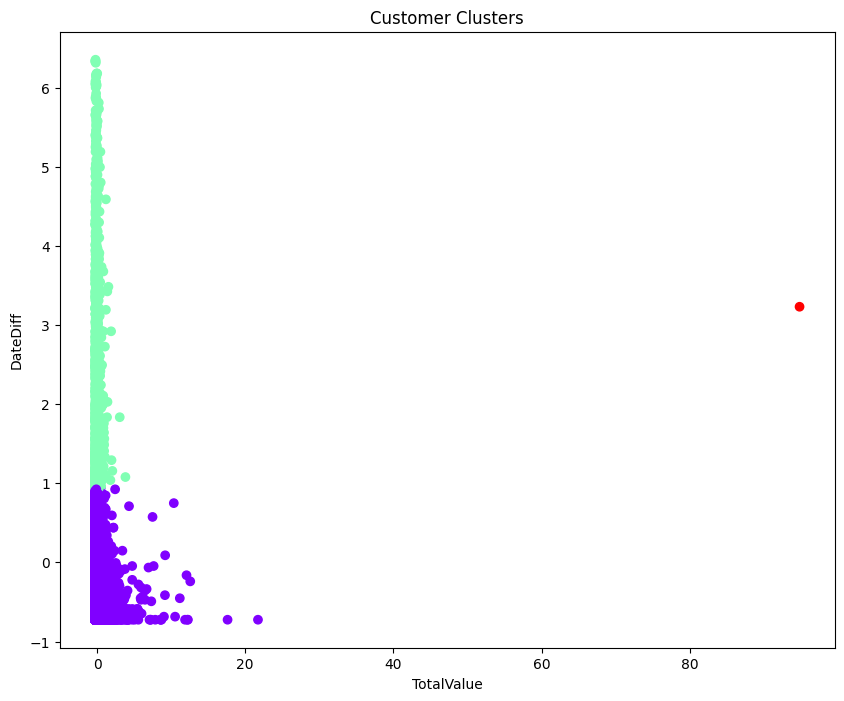

In [28]:
# prompt: cluster and graph TotalValue y DateDiff from df_grouped, remember to normalize variables, plot the clusters without the scaling

import matplotlib.pyplot as plt
# Normalize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_grouped[['TotalValue', 'DateDiff']] = scaler.fit_transform(df_grouped[['TotalValue', 'DateDiff']])
display(df_grouped.head())

# Perform clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_grouped[['TotalValue', 'DateDiff']])

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_grouped['TotalValue'], df_grouped['DateDiff'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('TotalValue')
plt.ylabel('DateDiff')
plt.title('Customer Clusters')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split

# Separate into training and evaluation datasets
X_train, X_test, y_train, y_test = train_test_split(
    df_grouped[['TotalValue', 'DateDiff']],
    kmeans.labels_,
    test_size=0.2,
    random_state=42
)

# Create a machine learning classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
score = classifier.score(X_test, y_test)
print("Score:", score)


Score: 0.9989539748953975


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


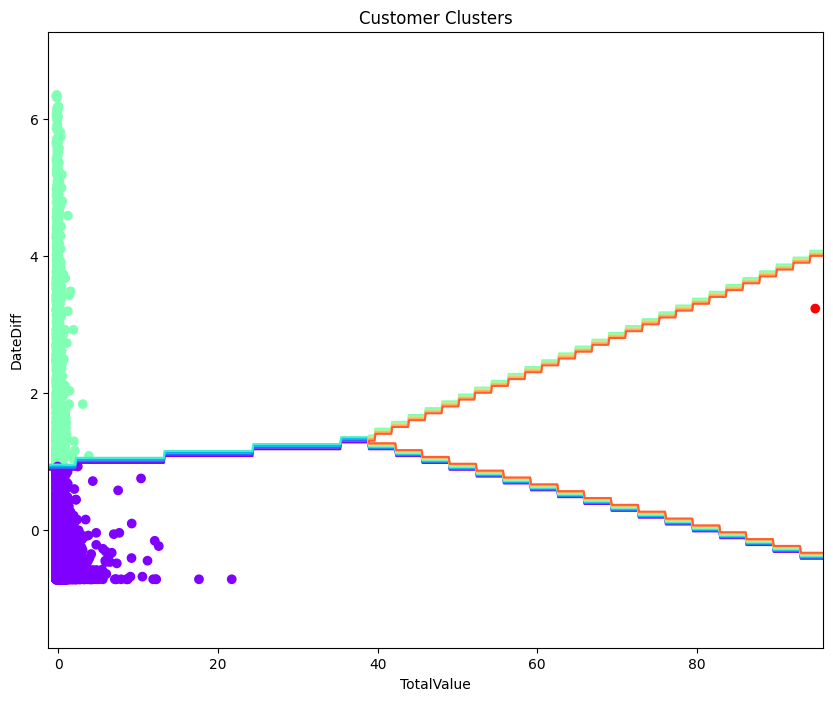

In [30]:
# prompt: plot according the results from the previous model

import matplotlib.pyplot as plt
import numpy as np
# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(df_grouped['TotalValue'], df_grouped['DateDiff'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('TotalValue')
plt.ylabel('DateDiff')
plt.title('Customer Clusters')

# Plot the decision boundary
x_min, x_max = df_grouped['TotalValue'].min() - 1, df_grouped['TotalValue'].max() + 1
y_min, y_max = df_grouped['DateDiff'].min() - 1, df_grouped['DateDiff'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap='rainbow')

plt.show()
